## 2.1 感知机模型
感知机是一种线性分类模型，属于判别模型

## 2.2 感知机学习策略
### 2.2.1 数据集的线性可分性
### 2.2.2 感知机学习策略
策略的重点再损失函数上<br>
为什么感知机使用**函数间隔**作为损失函数（忽略1/||W||）-- https://blog.csdn.net/zest_9527/article/details/89381088

## 2.3 感知机学习算法
感知机学习问题转化为求解损失函数式的最优化问题，最优化的方法是随机梯度下降法
### 2.3.1 感知机学习算法的原始形式
感知机学习算法由于采用不同的初值或选取不同的误分类点，解可以不同。
### 2.3.2 算法的收敛性
### 2.3.3 感知机学习的对偶形式


# 实例

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [2]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

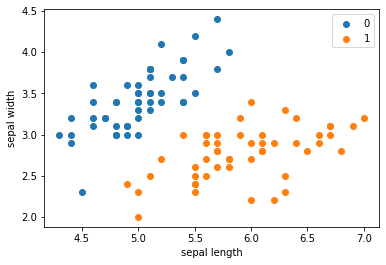

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [8]:
## 获得数据
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

**感知机**

In [9]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [10]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

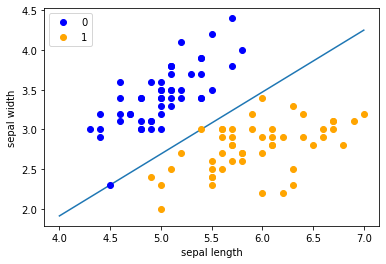

In [11]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn 实例

In [12]:
import sklearn
from sklearn.linear_model import Perceptron

'0.23.1'

In [14]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)

Perceptron()

In [17]:
print(clf.coef_)
print(clf.intercept_)

[[ 23.2 -38.7]]
[-5.]


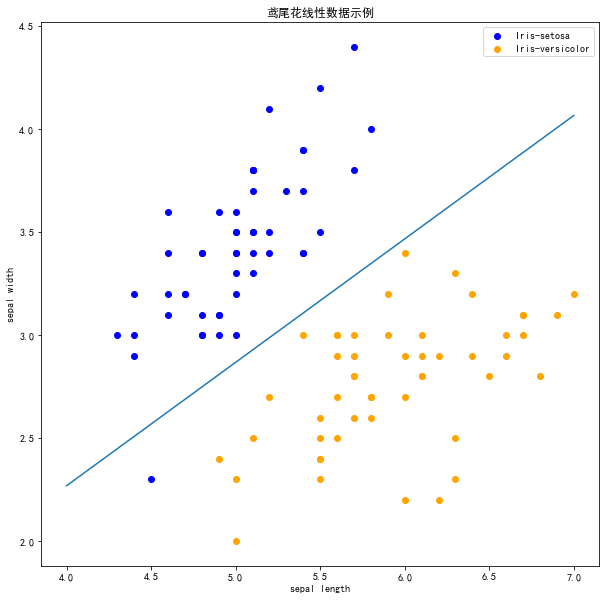

In [18]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

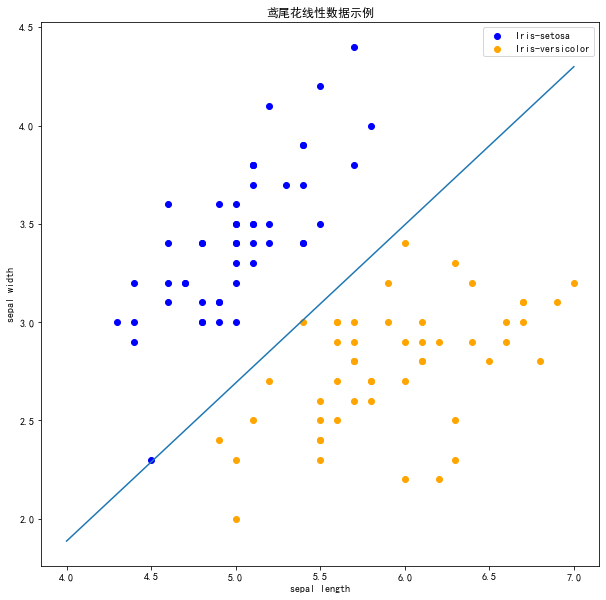

In [19]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 习题

### 习题2.1
Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

对于异或函数XOR，全部的输入与对应的输出如下：  

|<div style="width:20px">$x^{(1)}$</div>|<div style="width:20px">$x^{(2)}$</div>|$y$|
|:-: | :-: | :-: |  
| &nbsp;1 |  &nbsp;1 |-1 | 
| &nbsp;1 | -1 | &nbsp;1 | 
|-1 |  &nbsp;1 | &nbsp;1 | 
|-1 | -1 |-1 | 

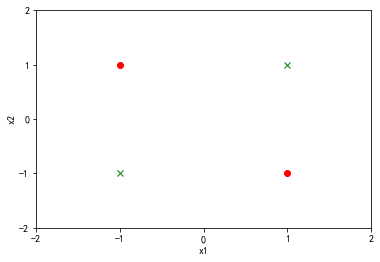

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x1 = [1, 1, -1, -1]
x2 = [1, -1, 1, -1]
y = [-1, 1, 1, -1]
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)
data = np.c_[x1, x2, y]
data = pd.DataFrame(data, index=None, columns=['x1', 'x2', 'y'])
data.head()

positive = data.loc[data['y'] == 1]
negative = data.loc[data['y'] == -1]

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xticks([-2, -1, 0, 1, 2])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(positive['x1'], positive['x2'], "ro")
plt.plot(negative['x1'], negative['x2'], "gx")
plt.show()

显然感知机无法使用一条直线将两类样本划分，异或问题是线性不可分的。

### 习题2.3


In [25]:
from sklearn.linear_model import Perceptron
import numpy as np

X_train = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y)
print("w:", perceptron_model.coef_, "\nb:", perceptron_model.intercept_, "\n")

result = perceptron_model.predict(X_train)
print(result)

w: [[1. 0.]] 
b: [-2.] 

[ 1  1 -1]


### 习题2.3
证明以下定理：样本集线性可分的充分必要条件是正实例点所构成的凸壳与负实例点所构成的凸壳互不相交。

<div class="alert alert-block alert-danger">
最后一题暂缓</div>